In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [10]:
#loading data, cleaning '?' symbols and Convert argument to a numeric type. Show the first 5 individuals and .
df=pd.read_csv('D:\FAMU-REU\projects\Theresa\kag_risk_factors_cervical_cancer.csv')
df = df.replace('?', np.nan) 
df=df.apply(pd.to_numeric)
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [11]:
# computing central tendencies statistical measures to obtain information regarding the give data
df.describe() 

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# droping columns 'STDs:AIDS','STDs:cervical condylomatosis'
df.drop(['STDs:AIDS','STDs:cervical condylomatosis'],axis=1,inplace=True)
df.drop(['Number of sexual partners','First sexual intercourse'],axis=1,inplace=True)

In [15]:
# replacing NaN values with zeros for 'Smokes', 'Smokes (packs/year)', 'Smokes (years)'.
df['Smokes'].fillna(0.0,inplace=True)
df['Smokes (packs/year)'].fillna(0.0,inplace=True)
df['Smokes (years)'].fillna(0.0,inplace=True)

In [ ]:
# replacing NaN values with the mode for 'IUD' and 'IUD (years)'
df['IUD'].fillna(df['IUD'].mode()[0],inplace=True)
df['IUD (years)'].fillna(df['IUD (years)'].mode()[0],inplace=True)

In [17]:
# cleaning NaN values from column Num of pregnancies 
df.loc[df['Num of pregnancies'].isna()].sort_values('Age')
df.loc[[819,812,690,814,745,811,744,703,544,692,697,699,693,706,696,810,813,365,265,653,816,707],'Num of pregnancies']='1.0'
df.loc[[708,272,820,689,197,691,421,650,702,167,698,185,694,700,695,701,545,817,808,809,123,815],'Num of pregnancies']='2.0'
df.loc[[818,96,807,41,19,704,651,18,652,654,9,705],'Num of pregnancies']='3.0'

df.loc[df['Hormonal Contraceptives'].isna()].sort_values('Age')[:30]['Hormonal Contraceptives'].fillna(0.0,inplace=True)
df.loc[df['Hormonal Contraceptives (years)'].isna()].sort_values('Age')[:30]['Hormonal Contraceptives (years)'].fillna(0.0,inplace=True)

In [18]:
df_hor_nan_30=df.loc[df['Hormonal Contraceptives'].isna()].sort_values('Age')[:29]
for i in df_hor_nan_30.index:
    df['Hormonal Contraceptives'].iloc[i]=0.0

C:\Users\carlo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:

df_hor_nan=df.loc[df['Hormonal Contraceptives'].isna()]
for i in df_hor_nan.index:
    df['Hormonal Contraceptives'].iloc[i]=1.0

In [19]:
df_hor_yrs_nan_30=df.loc[df['Hormonal Contraceptives (years)'].isna()].sort_values('Age')[:29]
for i in df_hor_yrs_nan_30.index:
    df['Hormonal Contraceptives (years)'].iloc[i]=0.0

In [21]:
df_hor_yrs_nan=(df.loc[df['Hormonal Contraceptives (years)'].isna()]).sort_values('Age')
df_hor_yrs_nan

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
762,19,1.0,0.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
696,19,1.0,1.0,1.0,0.040000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
586,19,1.0,1.0,7.0,0.513202,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
542,19,1.0,0.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
489,19,2.0,0.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,35,2.0,1.0,15.0,0.320000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
90,36,6.0,0.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
476,38,2.0,0.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
751,41,3.0,0.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [22]:
for i in df_hor_yrs_nan.index[:14]:
    df['Hormonal Contraceptives (years)'].iloc[i]=0.25
for i in df_hor_yrs_nan.index[14:16]:
    df['Hormonal Contraceptives (years)'].iloc[i]=0.5
for i in df_hor_yrs_nan.index[16:43]:
    df['Hormonal Contraceptives (years)'].iloc[i]=1.0
for i in df_hor_yrs_nan.index[43:57]:
    df['Hormonal Contraceptives (years)'].iloc[i]=2.0
for i in df_hor_yrs_nan.index[57:71]:
    df['Hormonal Contraceptives (years)'].iloc[i]=3.0
for i in df_hor_yrs_nan.index[71:79]:
    df['Hormonal Contraceptives (years)'].iloc[i]=5.0

C:\Users\carlo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
pd.to_numeric(df['Num of pregnancies'],)
df=df.astype({'Num of pregnancies':'float'})
df['STDs: Time since first diagnosis'].fillna(0.0,inplace=True)
df['STDs: Time since last diagnosis'].fillna(0.0,inplace=True)


In [26]:
for i in df.columns:
    df[i].fillna(0.0,inplace=True)
df.drop(['Hormonal Contraceptives'],axis=1,inplace=True)

In [27]:
# Verifying NaN values on our dataset
df.isnull().sum()

Age                                   0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Dx:Cancer                             0
Dx:CIN                                0


In [28]:
# Creating data for samples and labels 
y=df['Biopsy']
X=df.drop(['Biopsy'],axis=1)

In [34]:
# Expliting data sets between training and testing 
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
# prinitng number of samples for training
print('number of samples for training {0:d} and number of samples for validation {1:d}'.format(len(X_train),len(X_val)))

number of samples for training 686 and number of samples for validation 172


In [35]:
# Defining the Multi-layer Perceptron (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 6), random_state=1, max_iter=600)
# Train the model MLPC using the training dataset
model.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

In [36]:
# priting a text report using classification metrics. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 6), max_iter=600,
              random_state=1):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       164
           1       0.00      0.00      0.00         8

    accuracy                           0.94       172
   macro avg       0.48      0.49      0.49       172
weighted avg       0.91      0.94      0.92       172




Confusion matrix:
[[162   2]
 [  8   0]]


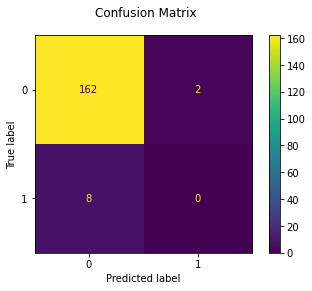

In [37]:
# Printing the confusion matrix

disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()